In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df = pd.read_csv('../Data/tsla.csv')
df.head()

,Date,Close,High,Low,Open,Volume
0,2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000
1,2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500
2,2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500
3,2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500
4,2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500


In [3]:
df.set_index('Date', inplace=True)

In [4]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500


In [5]:
train = df[:'2023']
test = df['2024':]


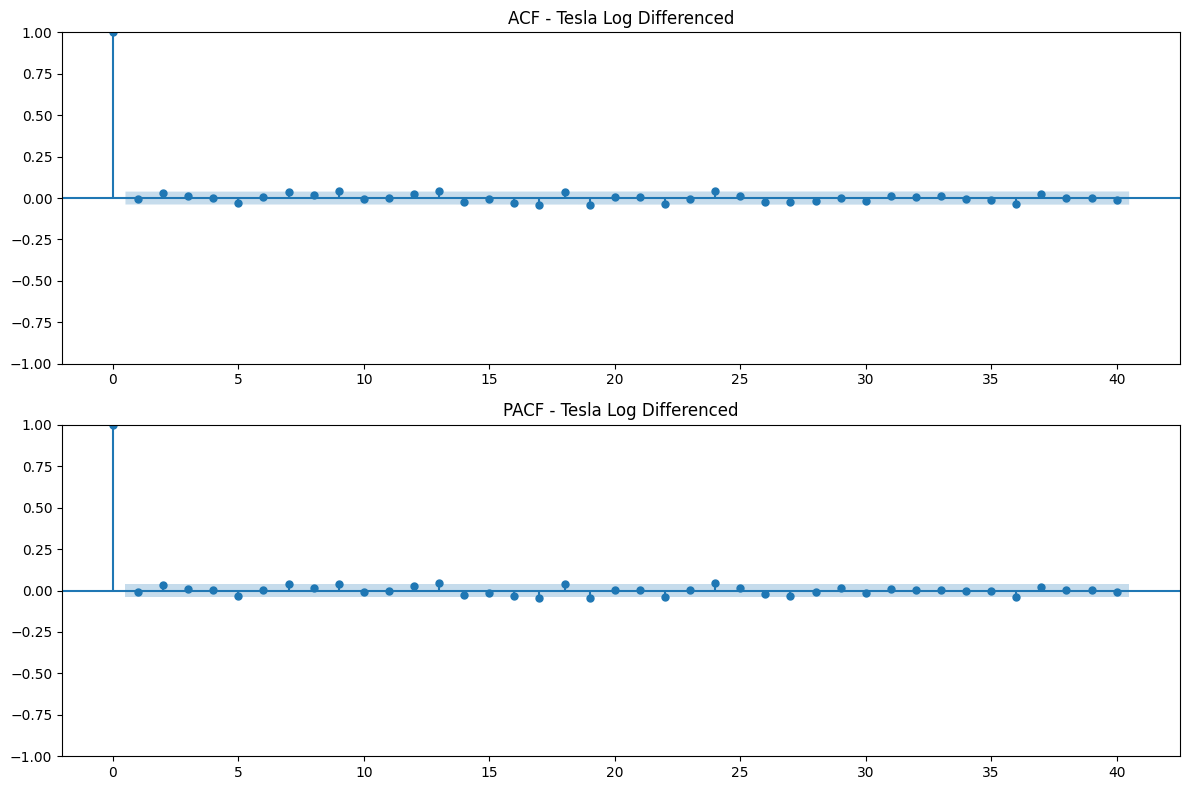

In [8]:
# Plot ACF and PACF for Order Selection

from statsmodels.tsa.stattools import adfuller

# Use log to stabilize variance
tsla_log = np.log1p(df['Close'].dropna())

# Differencing to make series stationary
tsla_log_diff = tsla_log.diff().dropna()

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(tsla_log_diff, ax=ax[0], lags=40)
ax[0].set_title("ACF - Tesla Log Differenced")

plot_pacf(tsla_log_diff, ax=ax[1], lags=40)
ax[1].set_title("PACF - Tesla Log Differenced")

plt.tight_layout()
plt.show()


In [9]:
# Fit ARIMA model on log-transformed Tesla Close price
model = ARIMA(tsla_log, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2535
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4798.518
Date:                Wed, 06 Aug 2025   AIC                          -9591.036
Time:                        07:25:21   BIC                          -9573.523
Sample:                             0   HQIC                         -9584.682
                               - 2535                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1737     13.089      0.013      0.989     -25.480      25.827
ma.L1         -0.1748     13.082     -0.013      0.989     -25.815      25.466
sigma2         0.0013   2.14e-05     61.930      0.0

In [22]:
# Fit ARIMA model on log-transformed Tesla Close price
model = ARIMA(tsla_log, order=(0, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2535
Model:                 ARIMA(0, 1, 1)   Log Likelihood                4798.576
Date:                Wed, 06 Aug 2025   AIC                          -9593.153
Time:                        07:33:10   BIC                          -9581.478
Sample:                             0   HQIC                         -9588.917
                               - 2535                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0073      0.015     -0.486      0.627      -0.037       0.022
sigma2         0.0013   2.11e-05     62.788      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [23]:
# Forecast
n_test = len(test)
forecast = model_fit.forecast(steps=n_test)

# If you need confidence intervals (optional)
# forecast, stderr, conf_int = model_fit.forecast(steps=n_test, alpha=0.05)


In [16]:
# Select only the 'Close' column from test data
test_close = test['Close']

# Also make sure forecast is a 1D array matching the 'Close' predictions
forecast_series = pd.Series(forecast, index=test_close.index)

# Compare predicted and actual Close prices
comparison_df = pd.DataFrame({
    'Actual': test_close,
    'Forecast': forecast_series
})


In [24]:
forecast_series

Date
2024-01-02   NaN
2024-01-03   NaN
2024-01-04   NaN
2024-01-05   NaN
2024-01-08   NaN
              ..
2025-07-24   NaN
2025-07-25   NaN
2025-07-28   NaN
2025-07-29   NaN
2025-07-30   NaN
Name: predicted_mean, Length: 395, dtype: float64